In [1]:
import numpy as np
import os
import pickle
import json

from shutil import unpack_archive
from collections import OrderedDict, defaultdict

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

from utils import tsplot

In [2]:
# Customize matplotlib appearance
sns.set_style("white")
matplotlib.rc('axes', titlesize=13, labelsize=20)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

matplotlib.rc('text', usetex=False)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

In [3]:
# Auxiliary functions
def parse_results(res):
    parsed_res = []
    for k, v in res.items():
        if k == 'episode':
            continue
        a1, a2 = k.split('_vs_')
        a2, m = a2.split('_')
        if m.endswith("1"):
            parsed_res.append((a1, a2, m[:-1], v))
        if m.endswith("2"):
            parsed_res.append((a2, a1, m[:-1], v))
    return parsed_res

In [4]:
# Load results
results = {}

results['IMP'] = defaultdict(list)
for seed in range(len(os.listdir("IMP"))):
    with open("IMP/seed-%d/progress.json" % seed) as fp:
        lines = fp.readlines()
    for l in lines:
        for a1, a2, m, v in parse_results(json.loads(l.strip())):
            results['IMP'][(a1, a2, m, seed)].append(v)
print(results)
agents = ['BRAT', 'JAL-Q', 'META-NASH', 'WoLF', 'NL-PG', 'LOLA']


{'IMP': defaultdict(<class 'list'>, {('BRAT', 'LOLA', 'pi', 1): [0.56, 0.71, 0.92, 0.615, 0.855, 0.86, 0.78, 0.73, 0.81, 0.55, 0.625, 0.5800000000000001, 0.5, 0.495, 0.5, 0.495, 0.525, 0.78, 0.73, 0.575, 0.6799999999999999, 0.495, 0.505, 0.48, 0.505, 0.495, 0.43999999999999995, 0.5, 0.31499999999999995, 0.39, 0.28, 0.485, 0.5, 0.49, 0.495, 0.5, 0.505, 0.5, 0.495, 0.5, 0.49, 0.5, 0.5, 0.5, 0.495, 0.505, 0.48, 0.46499999999999997, 0.395, 0.45999999999999996], ('NL-PG', 'META-NASH', 'pi', 0): [0.635, 0.635, 0.665, 0.655, 0.6950000000000001, 0.64, 0.7, 0.63, 0.5449999999999999, 0.615, 0.64, 0.51, 0.585, 0.54, 0.525, 0.48, 0.53, 0.495, 0.475, 0.505, 0.475, 0.48, 0.45499999999999996, 0.43500000000000005, 0.42000000000000004, 0.39, 0.44999999999999996, 0.41000000000000003, 0.37, 0.39, 0.44499999999999995, 0.375, 0.39, 0.385, 0.41000000000000003, 0.33999999999999997, 0.365, 0.37, 0.41000000000000003, 0.37, 0.33499999999999996, 0.36, 0.33499999999999996, 0.355, 0.395, 0.37, 0.345, 0.32999999999

In [5]:
# # Plot normalized discounted returns over episodes for IMP
# fig, axes = plt.subplots(1, 6, figsize=(24, 4))
# 
# res = results['IMP']
# for i1, a1 in enumerate(agents):
# #     for i2, a2 in enumerate(agents):
#     ax = axes[i1]
#     ax.set_title(a1, fontsize=24)
#     episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IMP")), axis=0)[:, :50]
#     rets = 0.
#     for i2, a2 in enumerate(agents):
#         rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IMP")))])[:, :50]
#     print(np.mean(episodes, axis=0).shape, np.mean(rets, axis=0).shape)
#     rets /= len(agents)
#     plt.plot(np.mean(episodes, axis=0), np.mean(rets, axis=0))
#     ax.set_ylim([-1.1, 1.1])
# 
# fig.tight_layout()

(10, 50)
(10, 50)
(10, 50)
(10, 50)
(10, 50)
(10, 50)


c:\users\patrick\anaconda3\envs\py35\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


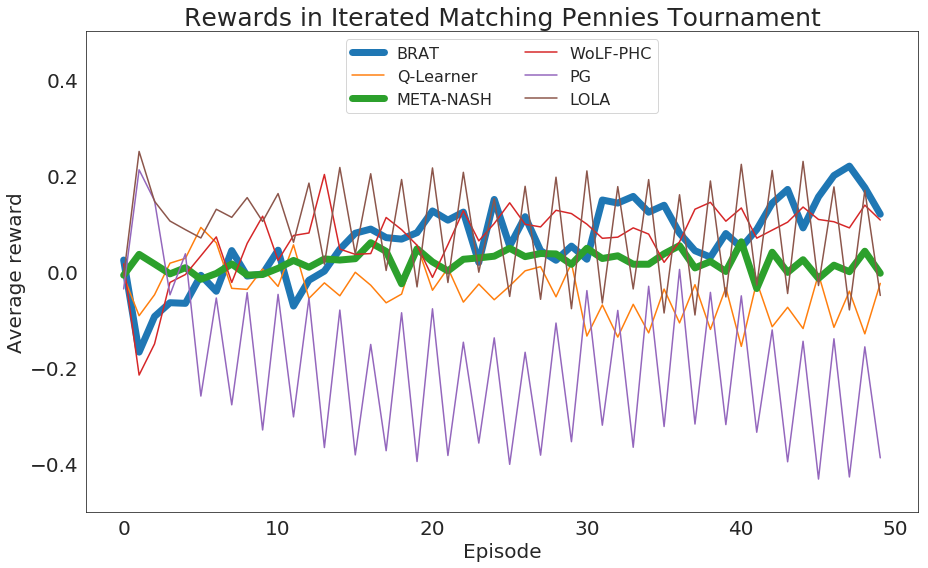

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.set_title("Rewards in Iterated Matching Pennies Tournament", fontsize=25)

ax.set_ylabel("Average reward")
ax.set_xlabel("Episode")

colors = sns.color_palette()

net_reward = []
res = results['IMP']
for i1, a1 in enumerate(agents):
    episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IMP")), axis=0)[:, :50]
    print(episodes.shape)
    rets = 0.
    for i2, a2 in enumerate(agents):
        rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IMP")))])[:, :50]
    rets /= len(agents)
    if a1 == "BRAT" or a1 == "META-NASH":
        plt.plot(np.mean(episodes, axis=0), np.mean(rets, axis=0), linewidth=7.0)
    else:
        plt.plot(np.mean(episodes, axis=0), np.mean(rets, axis=0))
    net_reward.append(np.sum(np.sum(rets, axis=0)))
    ax.set_ylim([-.5, .5])
ax.legend(['BRAT', 'Q-Learner', 'META-NASH', 'WoLF-PHC', 'PG', 'LOLA'], ncol=2, loc='upper center')
fig.tight_layout()
fig.savefig("tnt-results-IMP.pdf")

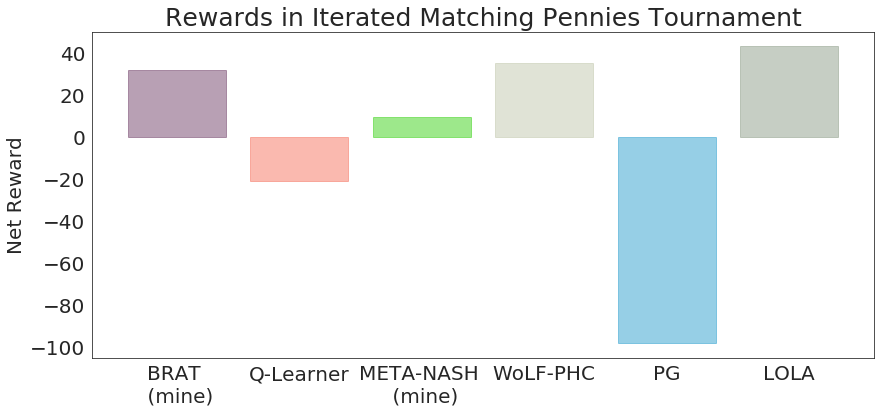

In [7]:
fig2, ax2 = plt.subplots(1, 1, figsize=(14,6))
ax2.set_ylabel("Net Reward")
ax2.set_title("Rewards in Iterated Matching Pennies Tournament", fontsize=25)
barplot = ax2.bar(['BRAT \n (mine)', 'Q-Learner', 'META-NASH \n (mine)', 'WoLF-PHC', 'PG', 'LOLA'], net_reward, align='center', alpha=0.5)
for bar in barplot:
    bar.set_color(c=np.random.rand(3,))